# Health Insurance Prediction

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

## Loading the Data

In [2]:
data = pd.read_csv('./dataset/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Exploratory Data Analysis

### Understanding the Data

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
print('The dataset has {} rows and {} columns'.format(data.shape[0], data.shape[1]))

The dataset has 1338 rows and 7 columns


In [6]:
print('Number of NaN values: {}'.format(data.isna().any().sum()))
print('Number of null values: {}'.format(data.isnull().any().sum()))

Number of NaN values: 0
Number of null values: 0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
# Checking for duplicates in the dataset
data.duplicated().values.any()

True

In [9]:
print('Number of duplicate values: {}'.format(data.duplicated().any().sum()))

Number of duplicate values: 1


In [10]:
# Checking for the duplicated entry
data[data.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [11]:
# Drop the duplicated entry
data.drop_duplicates(inplace=True)

In [12]:
data.shape

(1337, 7)

In [13]:
# Confirm that duplicate is dropped
print(data.duplicated().values.any())
print('Number of duplicate values: {}'.format(data.duplicated().values.sum()))

False
Number of duplicate values: 0


### Descriptive Statistics

In [14]:
data.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


#### Distribution of Insurance Charges

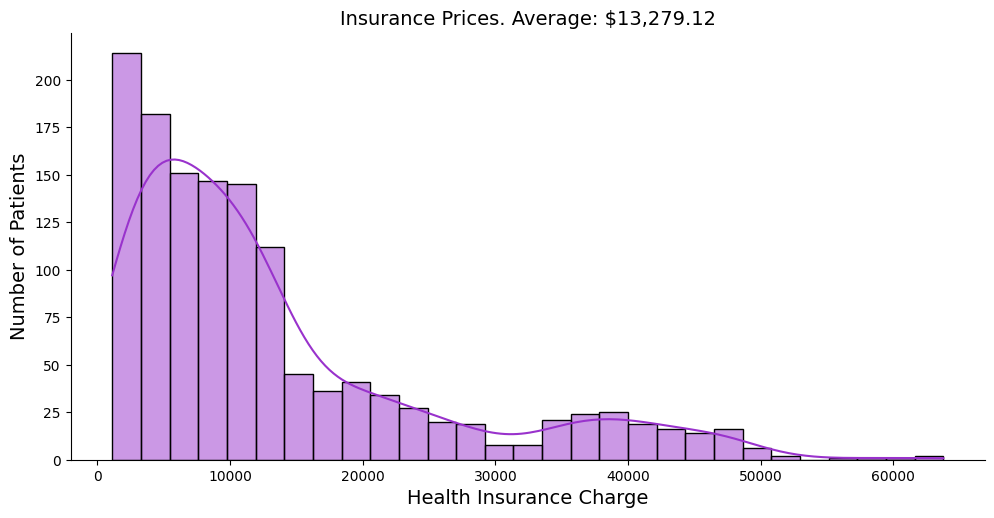

In [15]:
sns.displot(
    data=data,
    x='charges',
    kde=True,
    aspect=2,
    color='darkorchid'
)

plt.title('Insurance Prices. Average: ${:,.2f}'.format(data.charges.mean()), fontsize=14)
plt.xlabel('Health Insurance Charge', fontsize=14)
plt.ylabel('Number of Patients', fontsize=14)
plt.show()

#### Distribution of Patient Ages

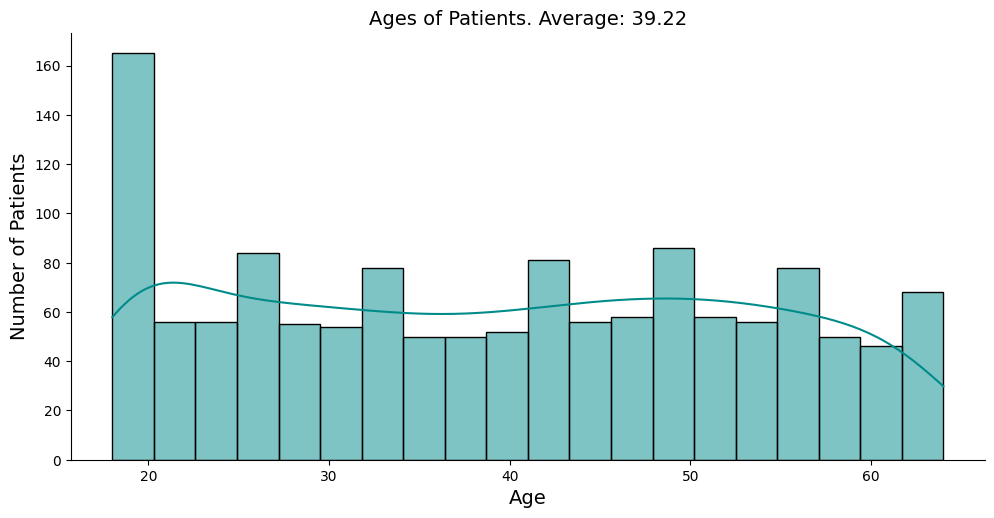

In [16]:
sns.displot(
    data=data,
    x='age',
    bins=20,
    kde=True,
    aspect=2,
    color='darkcyan'
)

plt.title('Ages of Patients. Average: {:.2f}'.format(data.age.mean()), fontsize=14)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Number of Patients', fontsize=14)
plt.show()

#### Analyzing Statistics By Gender

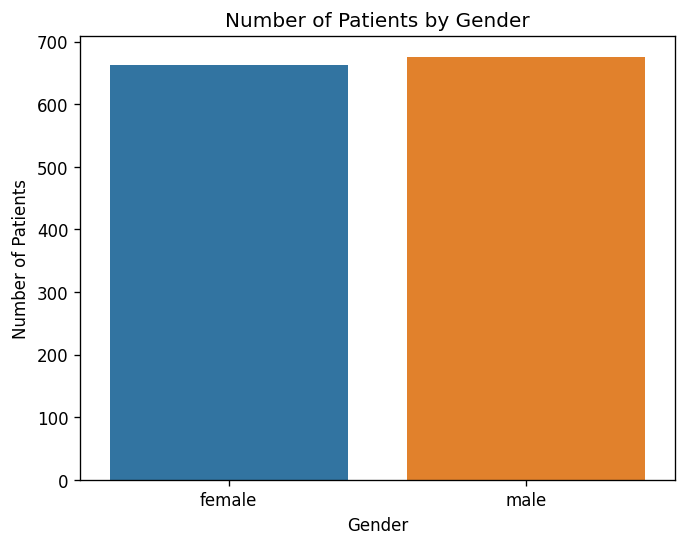

In [17]:
# Gender distribution in the dataset
plt.figure(dpi=120)

sns.countplot(
    data,
    x='sex',
    hue='sex',
)

plt.title('Number of Patients by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Patients')
plt.show()

The dataset has more male patients in the dataset than female

In [18]:
# Average cost of Insurance by Gender
gender_price = data.groupby('sex', as_index=False).agg({'charges': pd.Series.mean})

In [19]:
male_avg = gender_price[gender_price['sex'] == 'male'].values[0][1]
female_avg = gender_price[gender_price['sex'] == 'female'].values[0][1]

In [20]:
sex_bar = px.bar(
    gender_price,
    x='sex',
    y='charges',
    color='charges',
    title='Average Cost of Insurance by Gender. Male: ${:,.2f}  Female ${:,.2f}'.format(male_avg, female_avg),
    height=550,
    width=1000,
)

sex_bar.update_layout(
    xaxis_title='Gender',
    yaxis_title='Cost of Insurance',
    coloraxis_showscale=False,
)

sex_bar.show()

<img src="./plotly_plots/sex-bar.png">

We can see that on an average, insurance costs more for males than females according the dataset

In [21]:
hist = px.histogram(
    data,
    x='sex',
    color='smoker',
    color_discrete_sequence=px.colors.qualitative.T10,
    barmode='group',
    title='Distribution of Smokers by Gender',
    height=550,
    width=1000,
)

hist.update_layout(
    xaxis_title='Gender',
    yaxis_title='Number of Patients',
)

hist.show()

<img src="./plotly_plots/hist.png">

We can see that there are more male smokers than female, and more female non smokers than male

#### Average Cost of Insurace for Smokers / Non-smokers

In [22]:
smoker_price = data.groupby('smoker', as_index=False).agg({'charges': pd.Series.mean})

In [23]:
smoker_avg = smoker_price[smoker_price['smoker'] == 'yes'].values[0][1]
non_smoker_avg = smoker_price[smoker_price['smoker'] == 'no'].values[0][1]

In [24]:
smoke_bar = px.bar(
    smoker_price,
    x='smoker',
    y='charges',
    color='charges',
    color_continuous_scale='Aggrnyl',
    title='Average Cost of Insurance.\n Smoker: ${:,.2f} vs Non smoker: ${:,.2f}'.format(smoker_avg, non_smoker_avg),
    height=550,
    width=1000,
)

smoke_bar.update_layout(
    xaxis_title='Smoker?',
    yaxis_title='Cost of Insurance',
    coloraxis_showscale=False,
)

smoke_bar.show()

<img src="./plotly_plots/smoke_bar.png">

We can see that the average price of insurance is a lot more for patients that smoke 

#### Analyzing Statistics By Region

In [25]:
# Number of Regions
print(f'There are {len(data.region.value_counts())} regions in the dataset')
data.region.value_counts()

There are 4 regions in the dataset


region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

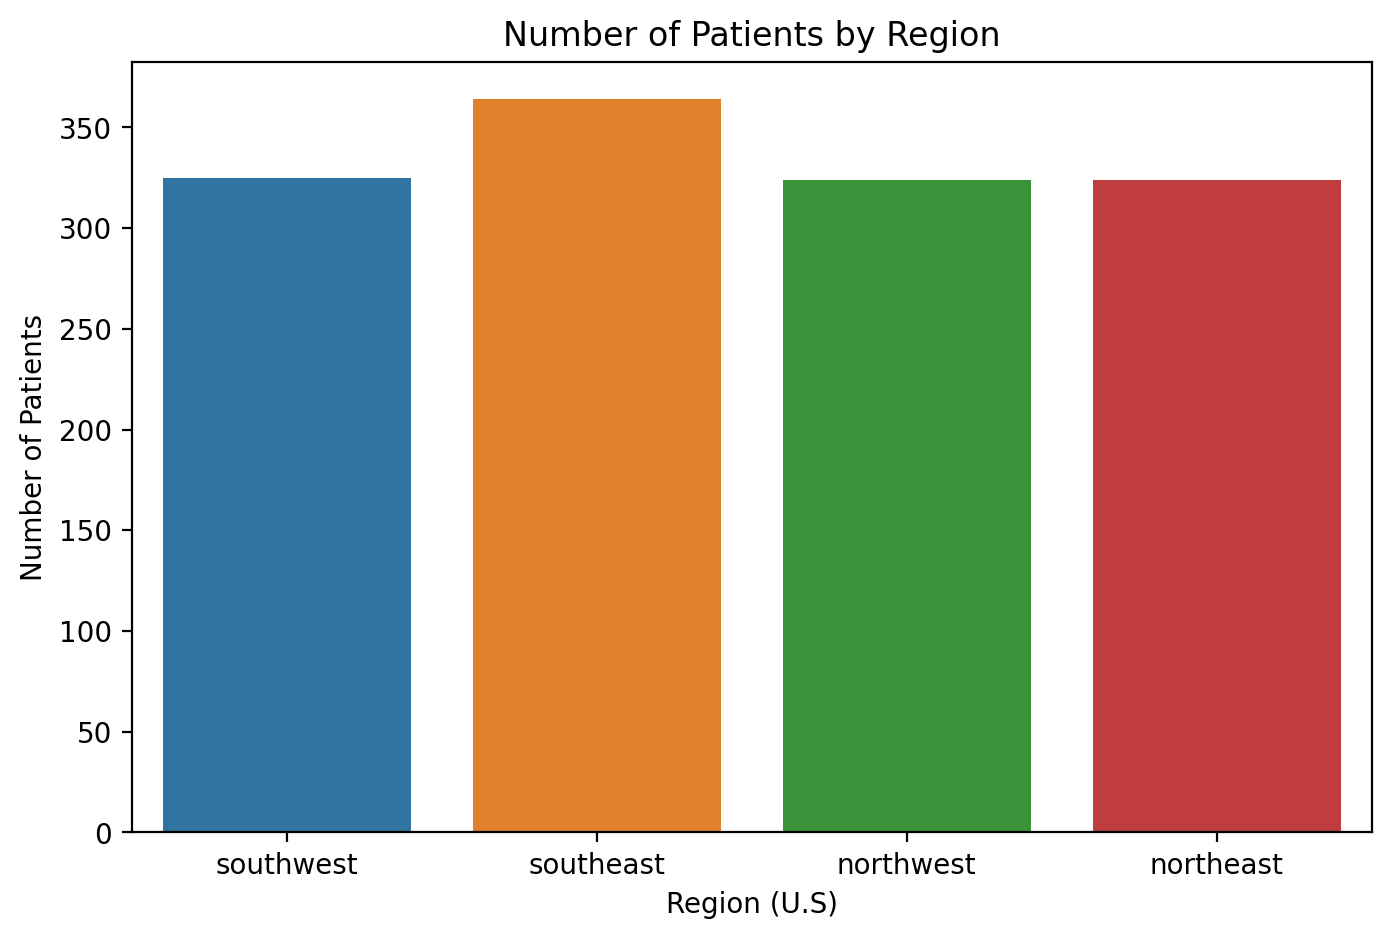

In [26]:
# Distribution of patients across the regions
plt.figure(figsize=(8, 5), dpi=200)

sns.countplot(
    data,
    x='region',
    hue='region',
)

plt.xlabel('Region (U.S)')
plt.ylabel('Number of Patients')
plt.title('Number of Patients by Region')
plt.show()

In [27]:
# Distribution of Smokers by Region
chart = px.histogram(
    data,
    x='region',
    color='smoker',
    color_discrete_sequence=px.colors.qualitative.Pastel,
    barmode='group',
    title='Distribution of Smokers by Region',
    height=550,
    width=1000,
)

chart.update_layout(
    xaxis_title='Region (U.S)',
    yaxis_title='Number of Patients',
)

chart.show()

<img src="./plotly_plots/chart.png">

- There are more non smokers in every region in the dataset
- The southeast region has the most number of smokers
- The southwest and northwest regions both have the same number of smokers

#### Analyzing Patient BMI 

In [28]:
# Creating categories for bmi values
bmi_cat = []
for i in data.bmi.values:
    if i < 18.5:
        bmi_cat.append('underweight')
    elif i >= 18.5 and i < 25:
        bmi_cat.append('normal weight')
    else:
        bmi_cat.append('overweight')

In [29]:
# Insert a column for the bmi categories
data.insert(4, column='bmi_cat', value=bmi_cat)

In [30]:
# Checking if column corresponds with bmi value
data.sample(10)

,age,sex,bmi,children,bmi_cat,smoker,region,charges
727,29,female,21.755,1,normal weight,yes,northeast,16657.71745
1264,49,female,33.345,2,overweight,no,northeast,10370.91255
189,29,female,32.110,2,overweight,no,northwest,4922.91590
848,27,female,24.100,0,normal weight,no,southwest,2974.12600
886,57,male,28.975,0,overweight,yes,northeast,27218.43725
599,52,female,37.525,2,overweight,no,northwest,33471.97189
609,30,male,37.800,2,overweight,yes,southwest,39241.44200
754,24,male,33.630,4,overweight,no,northeast,17128.42608
629,44,female,38.950,0,overweight,yes,northwest,42983.45850
229,47,male,25.460,2,overweight,no,northeast,9225.25640


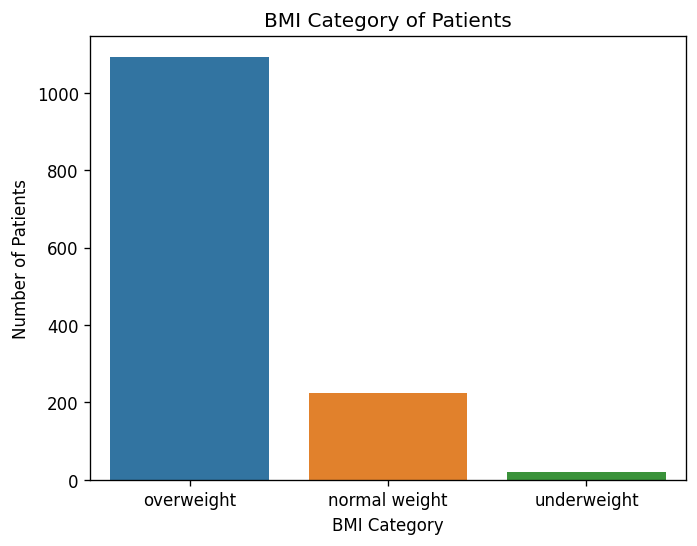

In [31]:
# Visualizing the distribution of patients bmi
plt.figure(dpi=120)

sns.countplot(
    data,
    x='bmi_cat',
    hue='bmi_cat',
)

plt.title('BMI Category of Patients')
plt.xlabel('BMI Category')
plt.ylabel('Number of Patients')
plt.show()

WOW! Most of the patients in the dataset are overweight

In [32]:
data.drop('bmi_cat', axis=1, inplace=True)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### Checking for Feature correlations

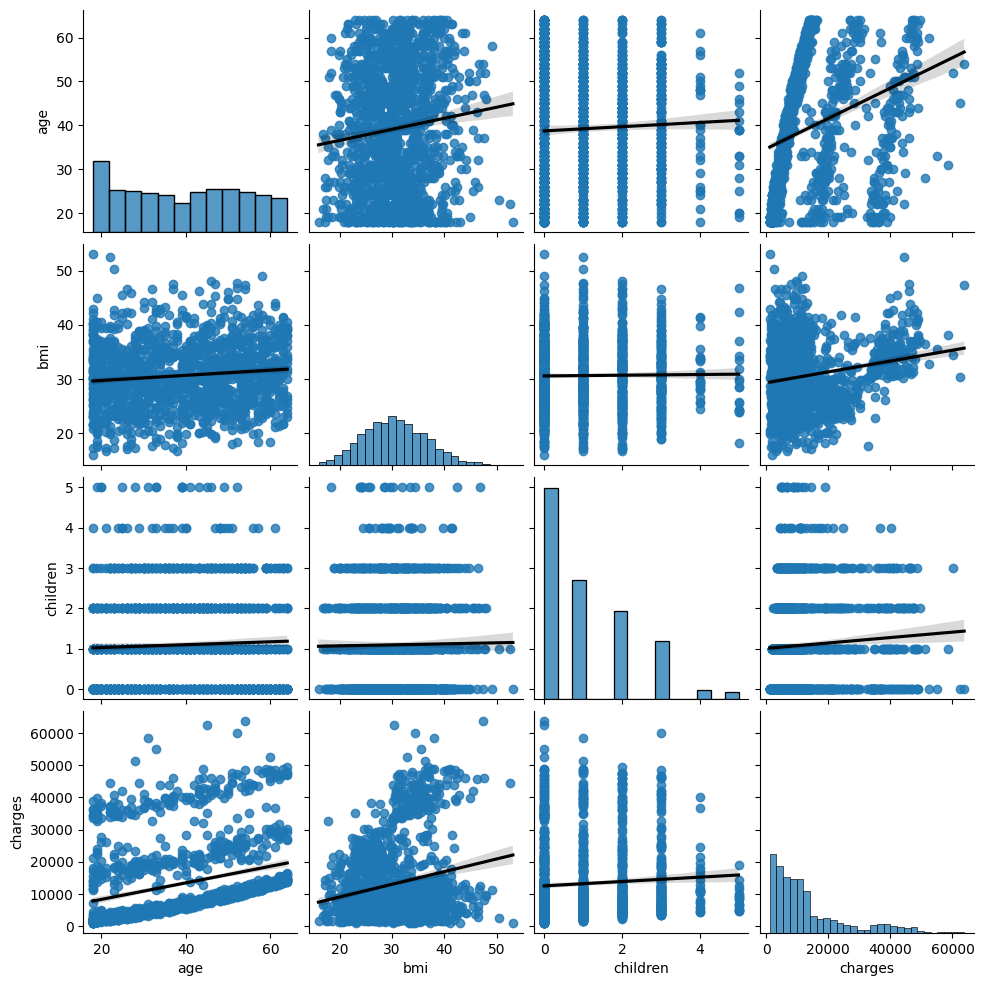

In [33]:
# Checking for correlations between features in the data
sns.pairplot(data, kind='reg', plot_kws={'line_kws': {'color': 'black'}})
plt.show()

No visible correlations betweeen features of the dataset

## Machine Learning

In [34]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [35]:
# Creating features and label arrays
X = data.iloc[:, :-1].values  # Features
y = data.iloc[:, -1].values # Label (charges)

In [36]:
print(X)

[[19 'female' 27.9 0 'yes' 'southwest']
 [18 'male' 33.77 1 'no' 'southeast']
 [28 'male' 33.0 3 'no' 'southeast']
 ...
 [18 'female' 36.85 0 'no' 'southeast']
 [21 'female' 25.8 0 'no' 'southwest']
 [61 'female' 29.07 0 'yes' 'northwest']]


In [37]:
print(y)

[16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]


### Encoding Categorical data

In [38]:
# Encoding gender and smoker features
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1, 4])], remainder='passthrough')
X = ct.fit_transform(X)

In [39]:
# Encoding region feature 
label_encoder = LabelEncoder()
X[:, 7] = label_encoder.fit_transform(X[:, 7])

In [40]:
region_map = {code: label for code, label in enumerate(label_encoder.classes_)}
print('region_map:', region_map)

region_map: {0: 'northeast', 1: 'northwest', 2: 'southeast', 3: 'southwest'}


In [41]:
print(X)

[[1.0 0.0 0.0 ... 27.9 0 3]
 [0.0 1.0 1.0 ... 33.77 1 2]
 [0.0 1.0 1.0 ... 33.0 3 2]
 ...
 [1.0 0.0 1.0 ... 36.85 0 2]
 [1.0 0.0 1.0 ... 25.8 0 3]
 [1.0 0.0 0.0 ... 29.07 0 1]]


One-Hot Encoding
- Female: 1. 0.
- Male: 0. 1.
- Yes: 0. 1.
- No: 1. 0.

### Splitting the Dataset into Training and Test Sets

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Train size:', (len(X_train), len(y_train)), '\nTest size:', (len(X_test), len(y_test)))

Train size: (1069, 1069) 
Test size: (268, 268)


### Training the Linear Regression Model on the Training Set

In [43]:
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

### Evaluating the Model Perfomance

In [44]:
# R-squared score
print('R-squared (training data): {:.2f}'.format(r2_score(y_train, regr.predict(X_train))))

R-squared (training data): 0.73


### Visualizing Predictions

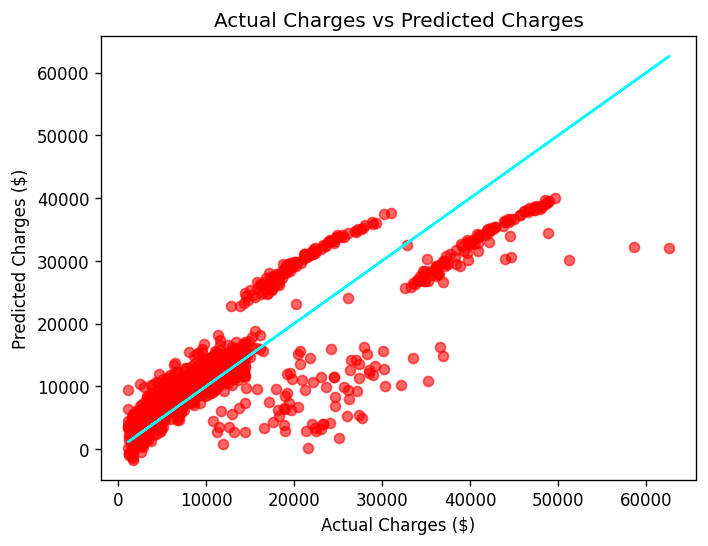

In [45]:
y_pred_train = regr.predict(X_train)

plt.figure(dpi=120)

plt.scatter(
    x=y_train,
    y=y_pred_train,
    c='red',
    alpha=0.6,
)
plt.plot(y_train, y_train, color='aqua')

plt.title('Actual Charges vs Predicted Charges')
plt.xlabel('Actual Charges ($)')
plt.ylabel('Predicted Charges ($)')
plt.show()

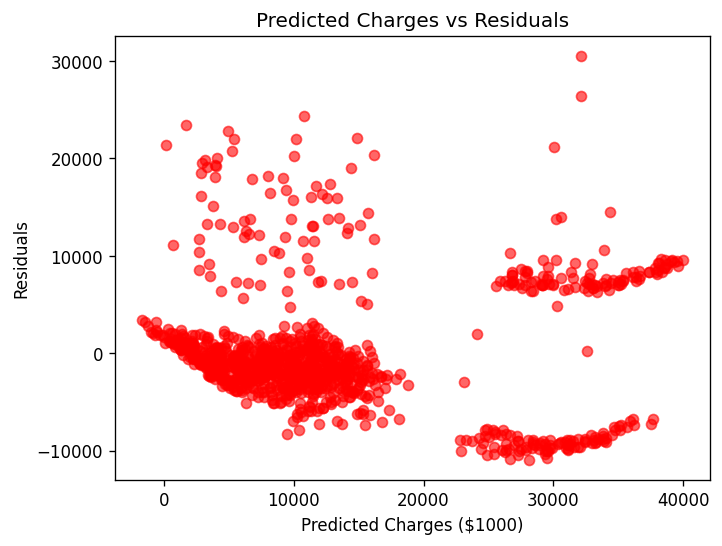

In [46]:
# Checking if there are visible patterns in the residuals
residuals = (y_train - y_pred_train)

plt.figure(dpi=120)

plt.scatter(
    x=y_pred_train,
    y=residuals,
    c='red',
    alpha=0.6,
)

plt.title('Predicted Charges vs Residuals')
plt.xlabel('Predicted Charges ($1000)')
plt.ylabel('Residuals')
plt.show()

### Polynomial Regression Approach
As a result of non-linear relationships between the features and dependent variable of the dataset

In [47]:
# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [48]:
# Creating Polynomial features for regression
pf = PolynomialFeatures(degree=5)
X_poly = pf.fit_transform(X_train_scaled)

In [49]:
# Training the polynomial regression model
poly_regr = LinearRegression()
poly_regr.fit(X_poly, y_train)

LinearRegression()

In [50]:
# Evaluating the training accuracy of the polynomial regression model
r2_score(y_train, poly_regr.predict(X_poly))

0.8757247314658976

### Comparing Model R-squared scores

In [51]:
print('Linear Regression R-squared (training data): {:.2f}'.format(r2_score(y_train, regr.predict(X_train))))
print('Linear Regression R-squared (test data): {:.2f}'.format(r2_score(y_test, regr.predict(X_test))))

print('\nPolynomial Regression R-Squared (training data): {:.2f}'.format(r2_score(y_train, poly_regr.predict(X_poly))))
print('Polynomial Regression R-Squared (test data): {:.2f}'.format(r2_score(y_test, poly_regr.predict(pf.transform(X_test_scaled)))))

Linear Regression R-squared (training data): 0.73
Linear Regression R-squared (test data): 0.81

Polynomial Regression R-Squared (training data): 0.88
Polynomial Regression R-Squared (test data): 0.51


* The polynomial regression model performs better on the training data than the linear regression, but performs poorly on the test set. There seems to be overfitting in the polynomial model.

### Using an Artificial Neural Network

In [52]:
def createNN(hidden: list = [32, 32]):
    model = Sequential()
    # Create an input layer
    model.add(Dense(units=32, input_dim=X_train.shape[1], activation='relu'))
    # Create hidden layers
    for i in hidden:
        model.add(Dense(units=i, activation='relu'))
    # Create an output layer
    model.add(Dense(units=1))

    return model

In [53]:
ann = createNN(hidden=[64, 64, 128])
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                288       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 128)               8320      
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 15,009
Trainable params: 15,009
Non-trainable params: 0
_________________________________________________________________


In [54]:
# Handling mixed data types:
X_train = X_train.astype(np.int32)
X_test = X_test.astype(np.int32)

In [55]:
# Compiling the model
ann.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['mean_absolute_error']
)

# Train the model on the training data
ann.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 304613568.0000 - mean_absolute_error: 12955.5586
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 275914272.0000 - mean_absolute_error: 11862.8516
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 162408544.0000 - mean_absolute_error: 8589.9883
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 123203552.0000 - mean_absolute_error: 8954.5781
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 122117144.0000 - mean_absolute_error: 8650.0352
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 121433744.0000 - mean_absolute_error: 8820.8242
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 120783328.0000 - mean_absolute_error: 8767.9941
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 120465584.0000 - mean_absolute_error: 8682.3643
Epoch 9/100
34/34 [===========

In [56]:
loss, mae = ann.evaluate(X_test, y_test)
print('\nTest Loss: {:,.2f}'.format(loss))
print('Test mean absolute error: {:,.2f}'.format(mae))

9/9 [==============================] - 0s 2ms/step - loss: 24645276.0000 - mean_absolute_error: 3256.1624

Test Loss: 24,645,276.00
Test mean absolute error: 3,256.16


In [57]:
train_pred = ann.predict(X_train)
test_pred = ann.predict(X_test)

print('\nANN R-squared (training data): {:.2f}'.format(r2_score(y_train, train_pred)))
print('ANN R-squared (test data): {:.2f}'.format(r2_score(y_test, test_pred)))

9/9 [==============================] - 0s 2ms/step

ANN R-squared (training data): 0.80
ANN R-squared (test data): 0.87
